<a href="https://colab.research.google.com/github/JeonyuB/Uchan/blob/Hell/%EB%A8%B8%EB%9F%B0%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM-단일채널

In [2]:
!pip install finance-datareader

Epoch 1/200
250/250 - 8s - loss: 5638660.0000 - mae: 5638660.0000 - val_loss: 1487205.5000 - val_mae: 1487205.5000 - 8s/epoch - 32ms/step
Epoch 2/200
250/250 - 3s - loss: 2164804.5000 - mae: 2164804.5000 - val_loss: 883703.6250 - val_mae: 883703.6250 - 3s/epoch - 12ms/step
Epoch 3/200
250/250 - 3s - loss: 2957573.7500 - mae: 2957573.7500 - val_loss: 736138.3750 - val_mae: 736138.3750 - 3s/epoch - 12ms/step
Epoch 4/200
250/250 - 3s - loss: 2167237.7500 - mae: 2167237.7500 - val_loss: 743568.8750 - val_mae: 743568.8750 - 3s/epoch - 12ms/step
Epoch 5/200
250/250 - 4s - loss: 1970689.5000 - mae: 1970689.5000 - val_loss: 740808.9375 - val_mae: 740808.9375 - 4s/epoch - 16ms/step
Epoch 6/200
250/250 - 4s - loss: 1869743.5000 - mae: 1869743.5000 - val_loss: 860111.7500 - val_mae: 860111.7500 - 4s/epoch - 16ms/step
Epoch 7/200
250/250 - 3s - loss: 1990031.6250 - mae: 1990031.6250 - val_loss: 1042543.4375 - val_mae: 1042543.4375 - 3s/epoch - 13ms/step
Epoch 8/200
250/250 - 2s - loss: 1825577.250

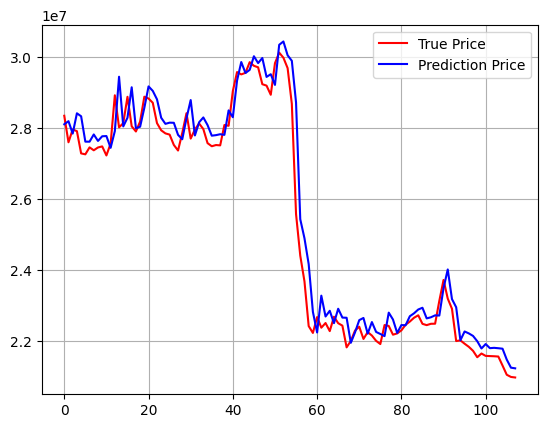

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import FinanceDataReader as fdr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

btc = fdr.DataReader('BTC/KRW', '2022-01-01', '2022-12-31')
btc = btc[['High']].to_numpy()

def btc2dataset(seq, window, horizon):
    X = []
    Y = []
    for i in range(len(seq) - (window + horizon) + 1):
        x = seq[i:(i + window)]
        y = (seq[i + window + horizon - 1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w = 7
h = 1

X, Y = btc2dataset(btc, w, h)

split = int(len(X) * 0.7)
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]

model = Sequential([
    LSTM(units=128, activation='relu', input_shape=(w, 1)),
    Dense(5),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

history = model.fit(x_train, y_train, epochs=200, batch_size=1,
                    validation_data=(x_test, y_test), verbose=2)
model.summary()

evaluation = model.evaluate(x_test, y_test, verbose=1)

prediction = model.predict(x_test)
x_range = range(len(y_test))

plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, prediction[x_range], color='blue')
plt.legend(['True Price', 'Prediction Price'], loc='best')
plt.grid()
plt.show()


LSTM-다중채널

Epoch 1/200
250/250 - 3s - loss: 0.0876 - mae: 0.0876 - val_loss: 0.0428 - val_mae: 0.0428 - 3s/epoch - 13ms/step
Epoch 2/200
250/250 - 2s - loss: 0.0586 - mae: 0.0586 - val_loss: 0.0291 - val_mae: 0.0291 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 0.0586 - mae: 0.0586 - val_loss: 0.0304 - val_mae: 0.0304 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 0.0518 - mae: 0.0518 - val_loss: 0.0289 - val_mae: 0.0289 - 2s/epoch - 10ms/step
Epoch 5/200
250/250 - 2s - loss: 0.0516 - mae: 0.0516 - val_loss: 0.0253 - val_mae: 0.0253 - 2s/epoch - 10ms/step
Epoch 6/200
250/250 - 2s - loss: 0.0473 - mae: 0.0473 - val_loss: 0.0282 - val_mae: 0.0282 - 2s/epoch - 6ms/step
Epoch 7/200
250/250 - 2s - loss: 0.0503 - mae: 0.0503 - val_loss: 0.0215 - val_mae: 0.0215 - 2s/epoch - 7ms/step
Epoch 8/200
250/250 - 2s - loss: 0.0458 - mae: 0.0458 - val_loss: 0.0231 - val_mae: 0.0231 - 2s/epoch - 7ms/step
Epoch 9/200
250/250 - 2s - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0249 - val_mae: 0.0249 - 

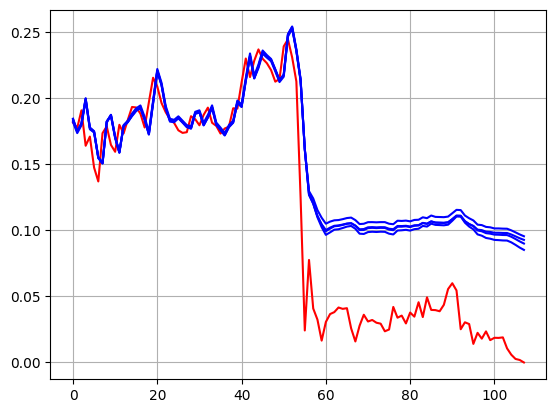

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import FinanceDataReader as fdr
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

btc = fdr.DataReader('BTC/KRW', '2022-01-01', '2022-12-31')
btc = btc[['Close', 'Open', 'High', 'Low']].to_numpy()

scaler = MinMaxScaler()
btc_normalized = scaler.fit_transform(btc)

def btc2dataset(seq, window, horizon):
    X = []
    Y = []
    for i in range(len(btc) - (window + horizon) + 1):
        x = btc_normalized[i:(i + window)]
        y = btc_normalized[i + window + horizon - 1, 0]  # 종가 (Close)를 예측
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w = 7
h = 1

X, Y = btc2dataset(btc, w, h)

split = int(len(X) * 0.7)
x_train = X[:split]
y_train = Y[:split]
x_test = X[split:]
y_test = Y[split:]

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=128, activation='relu', input_shape=(w, 4)),  # 수정된 부분
    tf.keras.layers.Dense(4),
])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

history = model.fit(x_train, y_train, epochs=200, batch_size=1,
                    validation_data=(x_test, y_test), verbose=2)
model.summary()

Evaluation = model.evaluate(x_test, y_test, verbose=1)
Prediction = model.predict(x_test)
x_range = range(len(y_test))

plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, Prediction[x_range], color='blue')
plt.grid()
plt.show()

RNN 단일 채널

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 17291 (67.54 KB)
Trainable params: 17291 (67.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
250/250 - 4s - loss: 3398836.0000 - mae: 3398836.0000 - val_loss: 1982483.2500 - val_mae: 1982483.2500 - 4s/epoch - 14ms/step
Epoch 2/200
250/250 - 1s - loss: 2244424.7500 - mae: 2244424.7500 - val_loss: 1488002.3750 - val_mae: 1488002.3750 - 1s/epoch - 4ms/step
Epoch 3/2

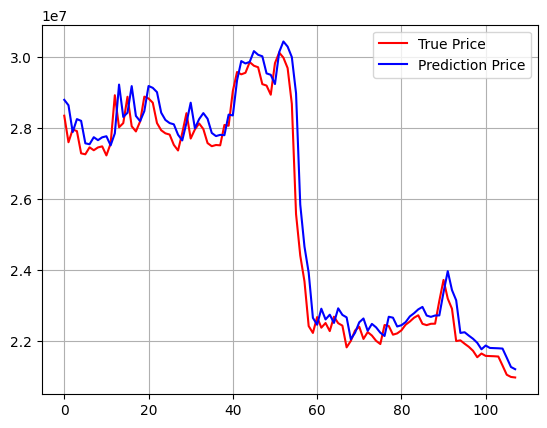

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import tensorflow as tf

# BTC 데이터 가져오기
btc = fdr.DataReader('BTC/KRW', '2022-01-01', '2022-12-31')
btc = btc[['High']].to_numpy()

# 데이터셋 생성 함수
def btc2dataset(seq, window, horizon):
    X = []
    Y = []
    for i in range(len(seq) - (window + horizon) + 1):
        x = seq[i:(i + window)]
        y = seq[i + window + horizon - 1]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w = 7
h = 1

X, Y = btc2dataset(btc, w, h)

split = int(len(X) * 0.7)
x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]

# 모델 정의
model = tf.keras.Sequential(name='sequential')

# RNN 레이어
model.add(tf.keras.layers.SimpleRNN(units=128, activation='relu', input_shape=(w, 1), name='simple_rnn'))

# Dense 레이어 1
model.add(tf.keras.layers.Dense(5, activation='relu', name='dense_1'))

# Dense 레이어 2
model.add(tf.keras.layers.Dense(1, activation='linear', name='dense_2'))

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.summary()

history = model.fit(x_train, y_train, epochs=200, batch_size=1,
                    validation_data=(x_test, y_test), verbose=2)

evaluation = model.evaluate(x_test, y_test, verbose=1)

prediction = model.predict(x_test)
x_range = range(len(y_test))

plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, prediction[x_range], color='blue')
plt.legend(['True Price', 'Prediction Price'], loc='best')
plt.grid()
plt.show()